Menampilkan grafik di layar...


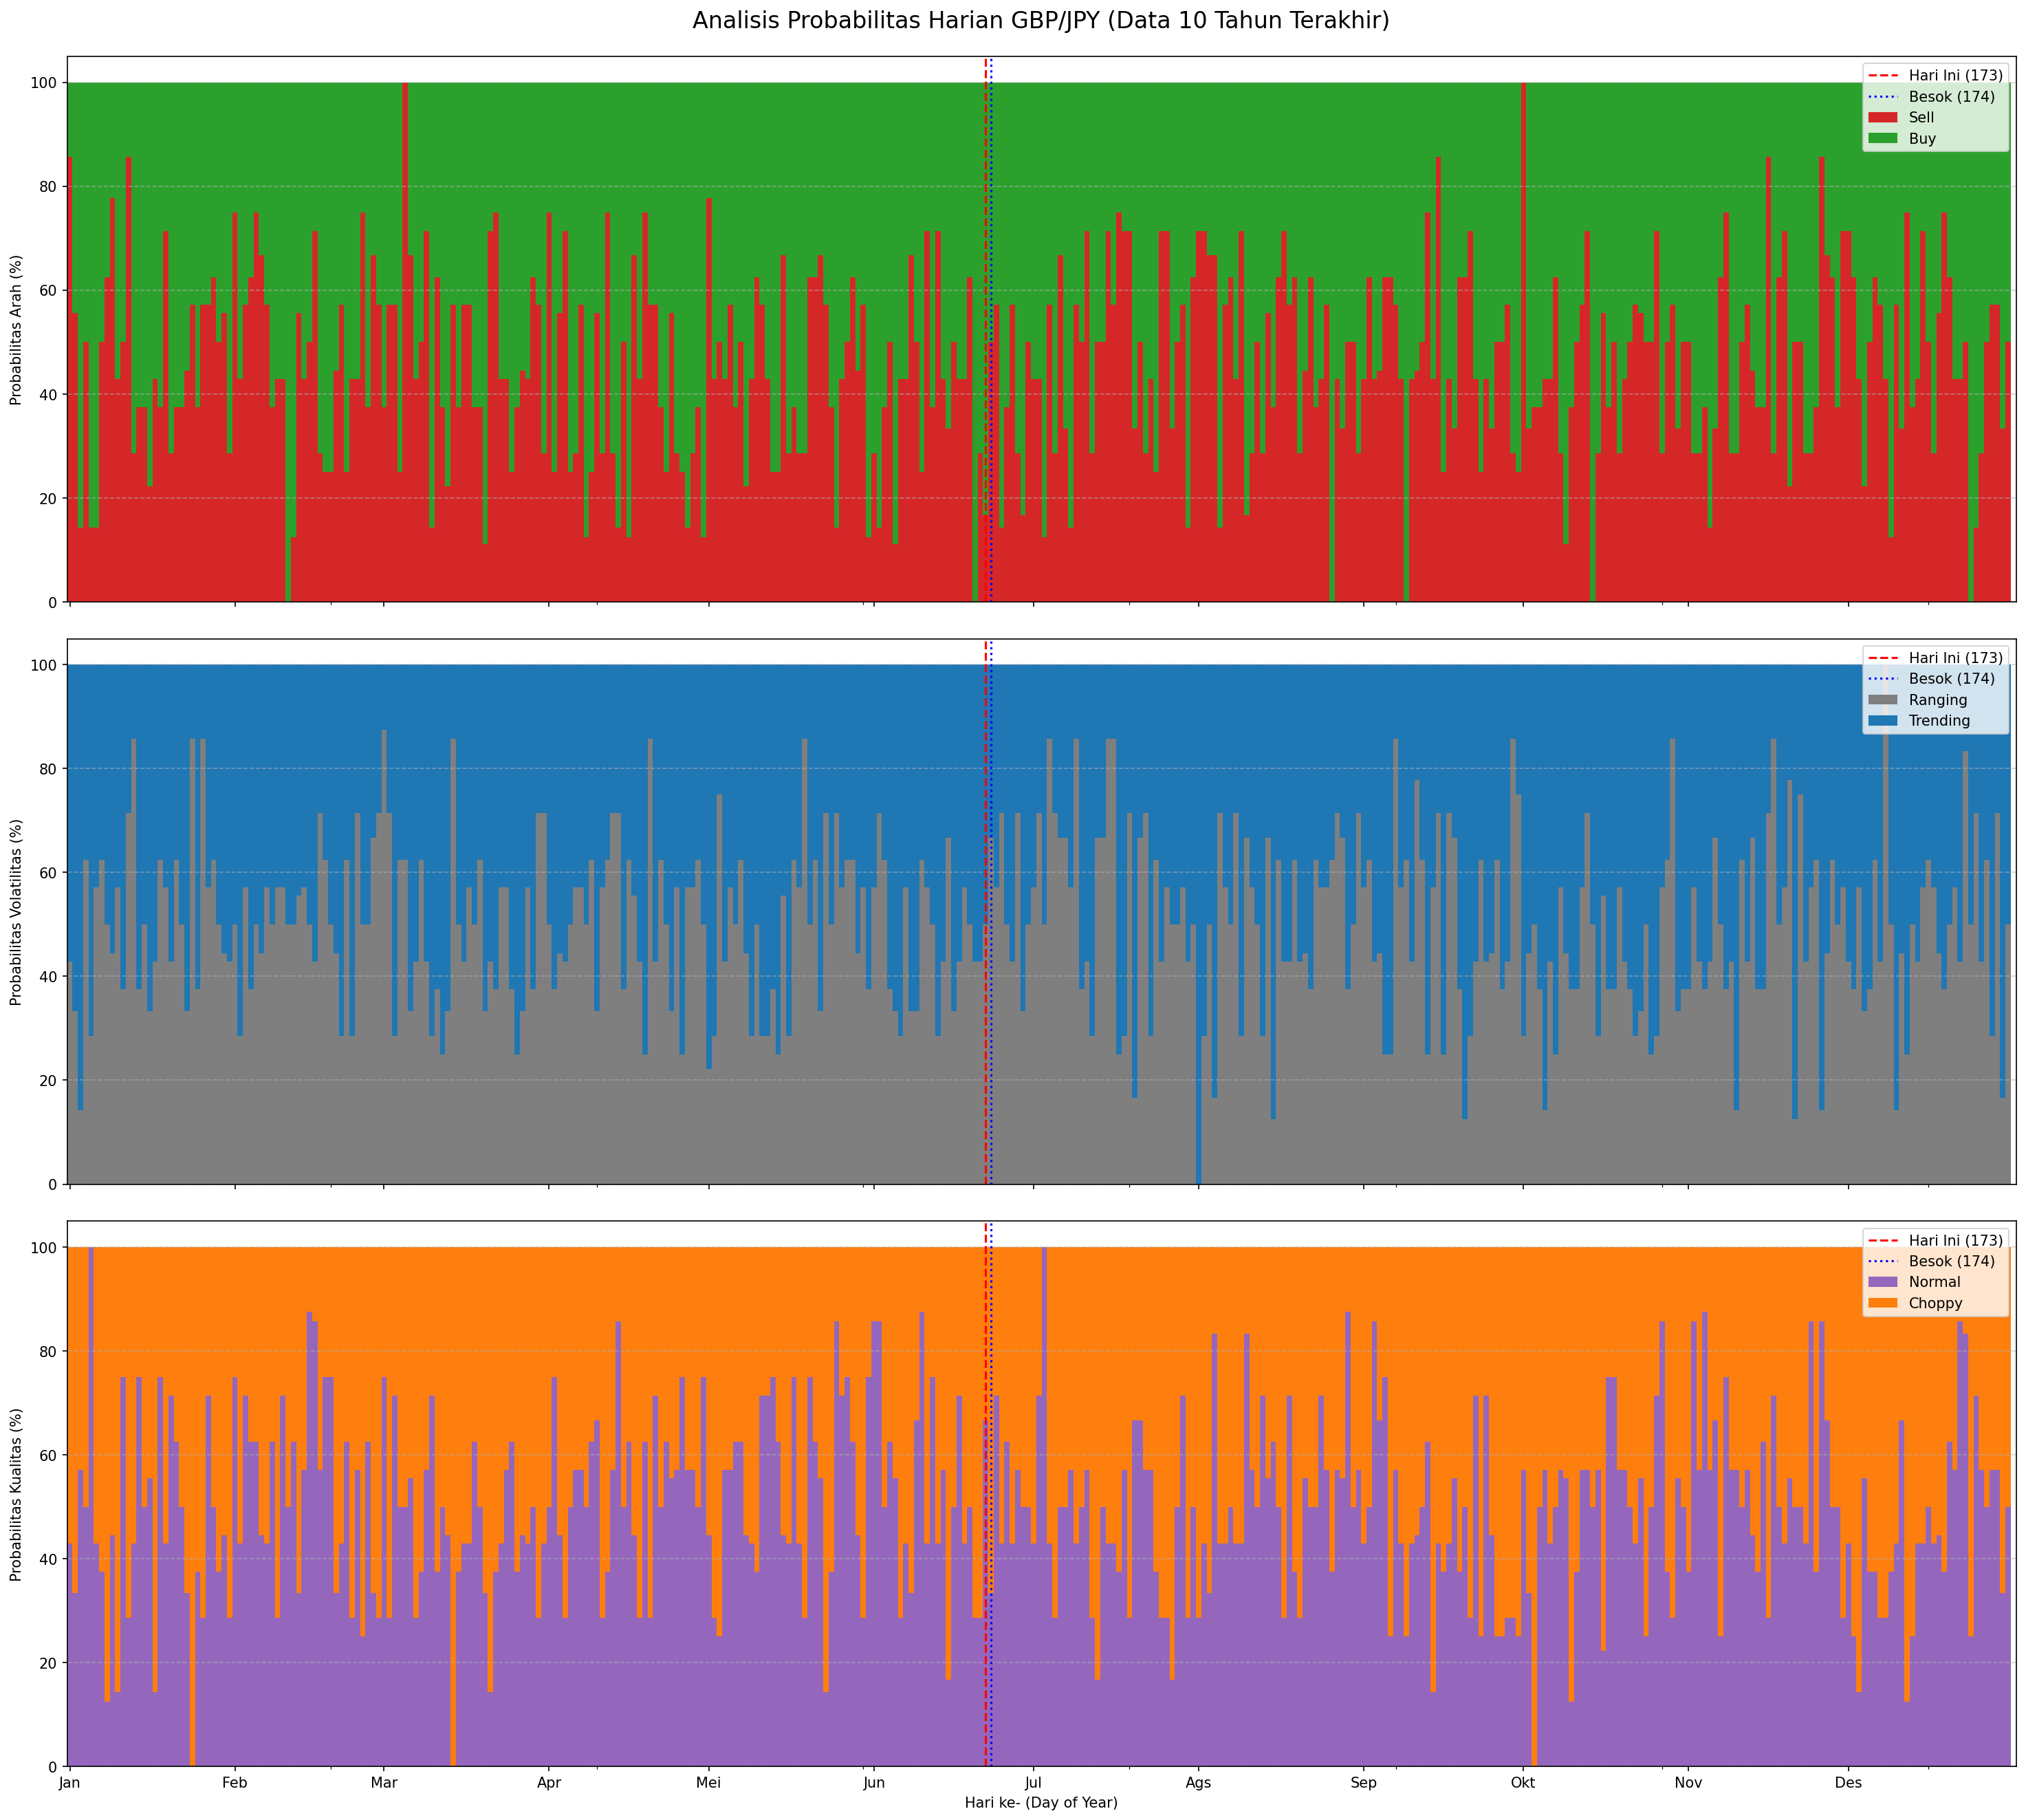


📊 Analisis Probabilitas Harian GBP/JPY
📅 Tanggal Analisis: 22 June 2025

Ringkasan Probabilitas untuk HARI INI (22 June 2025)
(Hari ke-173 dalam setahun)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 71.43%
  🔴 Kecenderungan Sell     : 28.57%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 57.14%
  ⚪ Kecenderungan Ranging  : 42.86%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 71.43%
  🟣 Kecenderungan Normal   : 28.57%


Ringkasan Probabilitas untuk HARI ESOK (23 June 2025)
(Hari ke-174 dalam setahun)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 83.33%
  🔴 Kecenderungan Sell     : 16.67%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 50.00%
  ⚪ Kecenderungan Ranging  : 50.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 33.33%
  🟣 Kecenderungan Normal   : 66.67%



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta # <--- MODIFIKASI: Tambahkan timedelta
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal (Folder & Nama File) ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "GBPJPY_Daily_201608110000_202506110000.csv"
today = datetime.now(zona_waktu_wib)
tomorrow = today + timedelta(days=1) # <--- MODIFIKASI: Hitung tanggal untuk besok
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    # Ganti dengan path file Anda jika perlu
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday
tomorrow_day_of_year_num = tomorrow.timetuple().tm_yday # <--- MODIFIKASI: Dapatkan hari ke- untuk besok

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Harian GBP/JPY (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    # <--- MODIFIKASI: Tambahkan garis vertikal untuk hari esok --->
    ax.axvline(x=tomorrow_day_of_year_num, color='blue', linestyle=':', linewidth=1.5, label=f'Besok ({tomorrow_day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian GBP/JPY")
summary_lines.append(f"📅 Tanggal Analisis: {today.strftime('%d %B %Y')}")
summary_lines.append("\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI INI ({today.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{day_of_year_num} dalam setahun)")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*60)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

# Ringkasan untuk Hari Ini
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))

# <--- MODIFIKASI: Tambahkan blok ringkasan untuk HARI ESOK --->
summary_lines.append("\n\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI ESOK ({tomorrow.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{tomorrow_day_of_year_num} dalam setahun)")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*60)

# Ringkasan untuk Hari Esok
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, tomorrow_day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, tomorrow_day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, tomorrow_day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*60)


summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

# (Opsional) Simpan ringkasan ke file teks
# with open(summary_txt_filepath, 'w', encoding='utf-8') as f:
#     f.write(summary_text)
# print(f"\nRingkasan juga telah disimpan ke file: {summary_txt_filepath}")

Menampilkan grafik di layar...


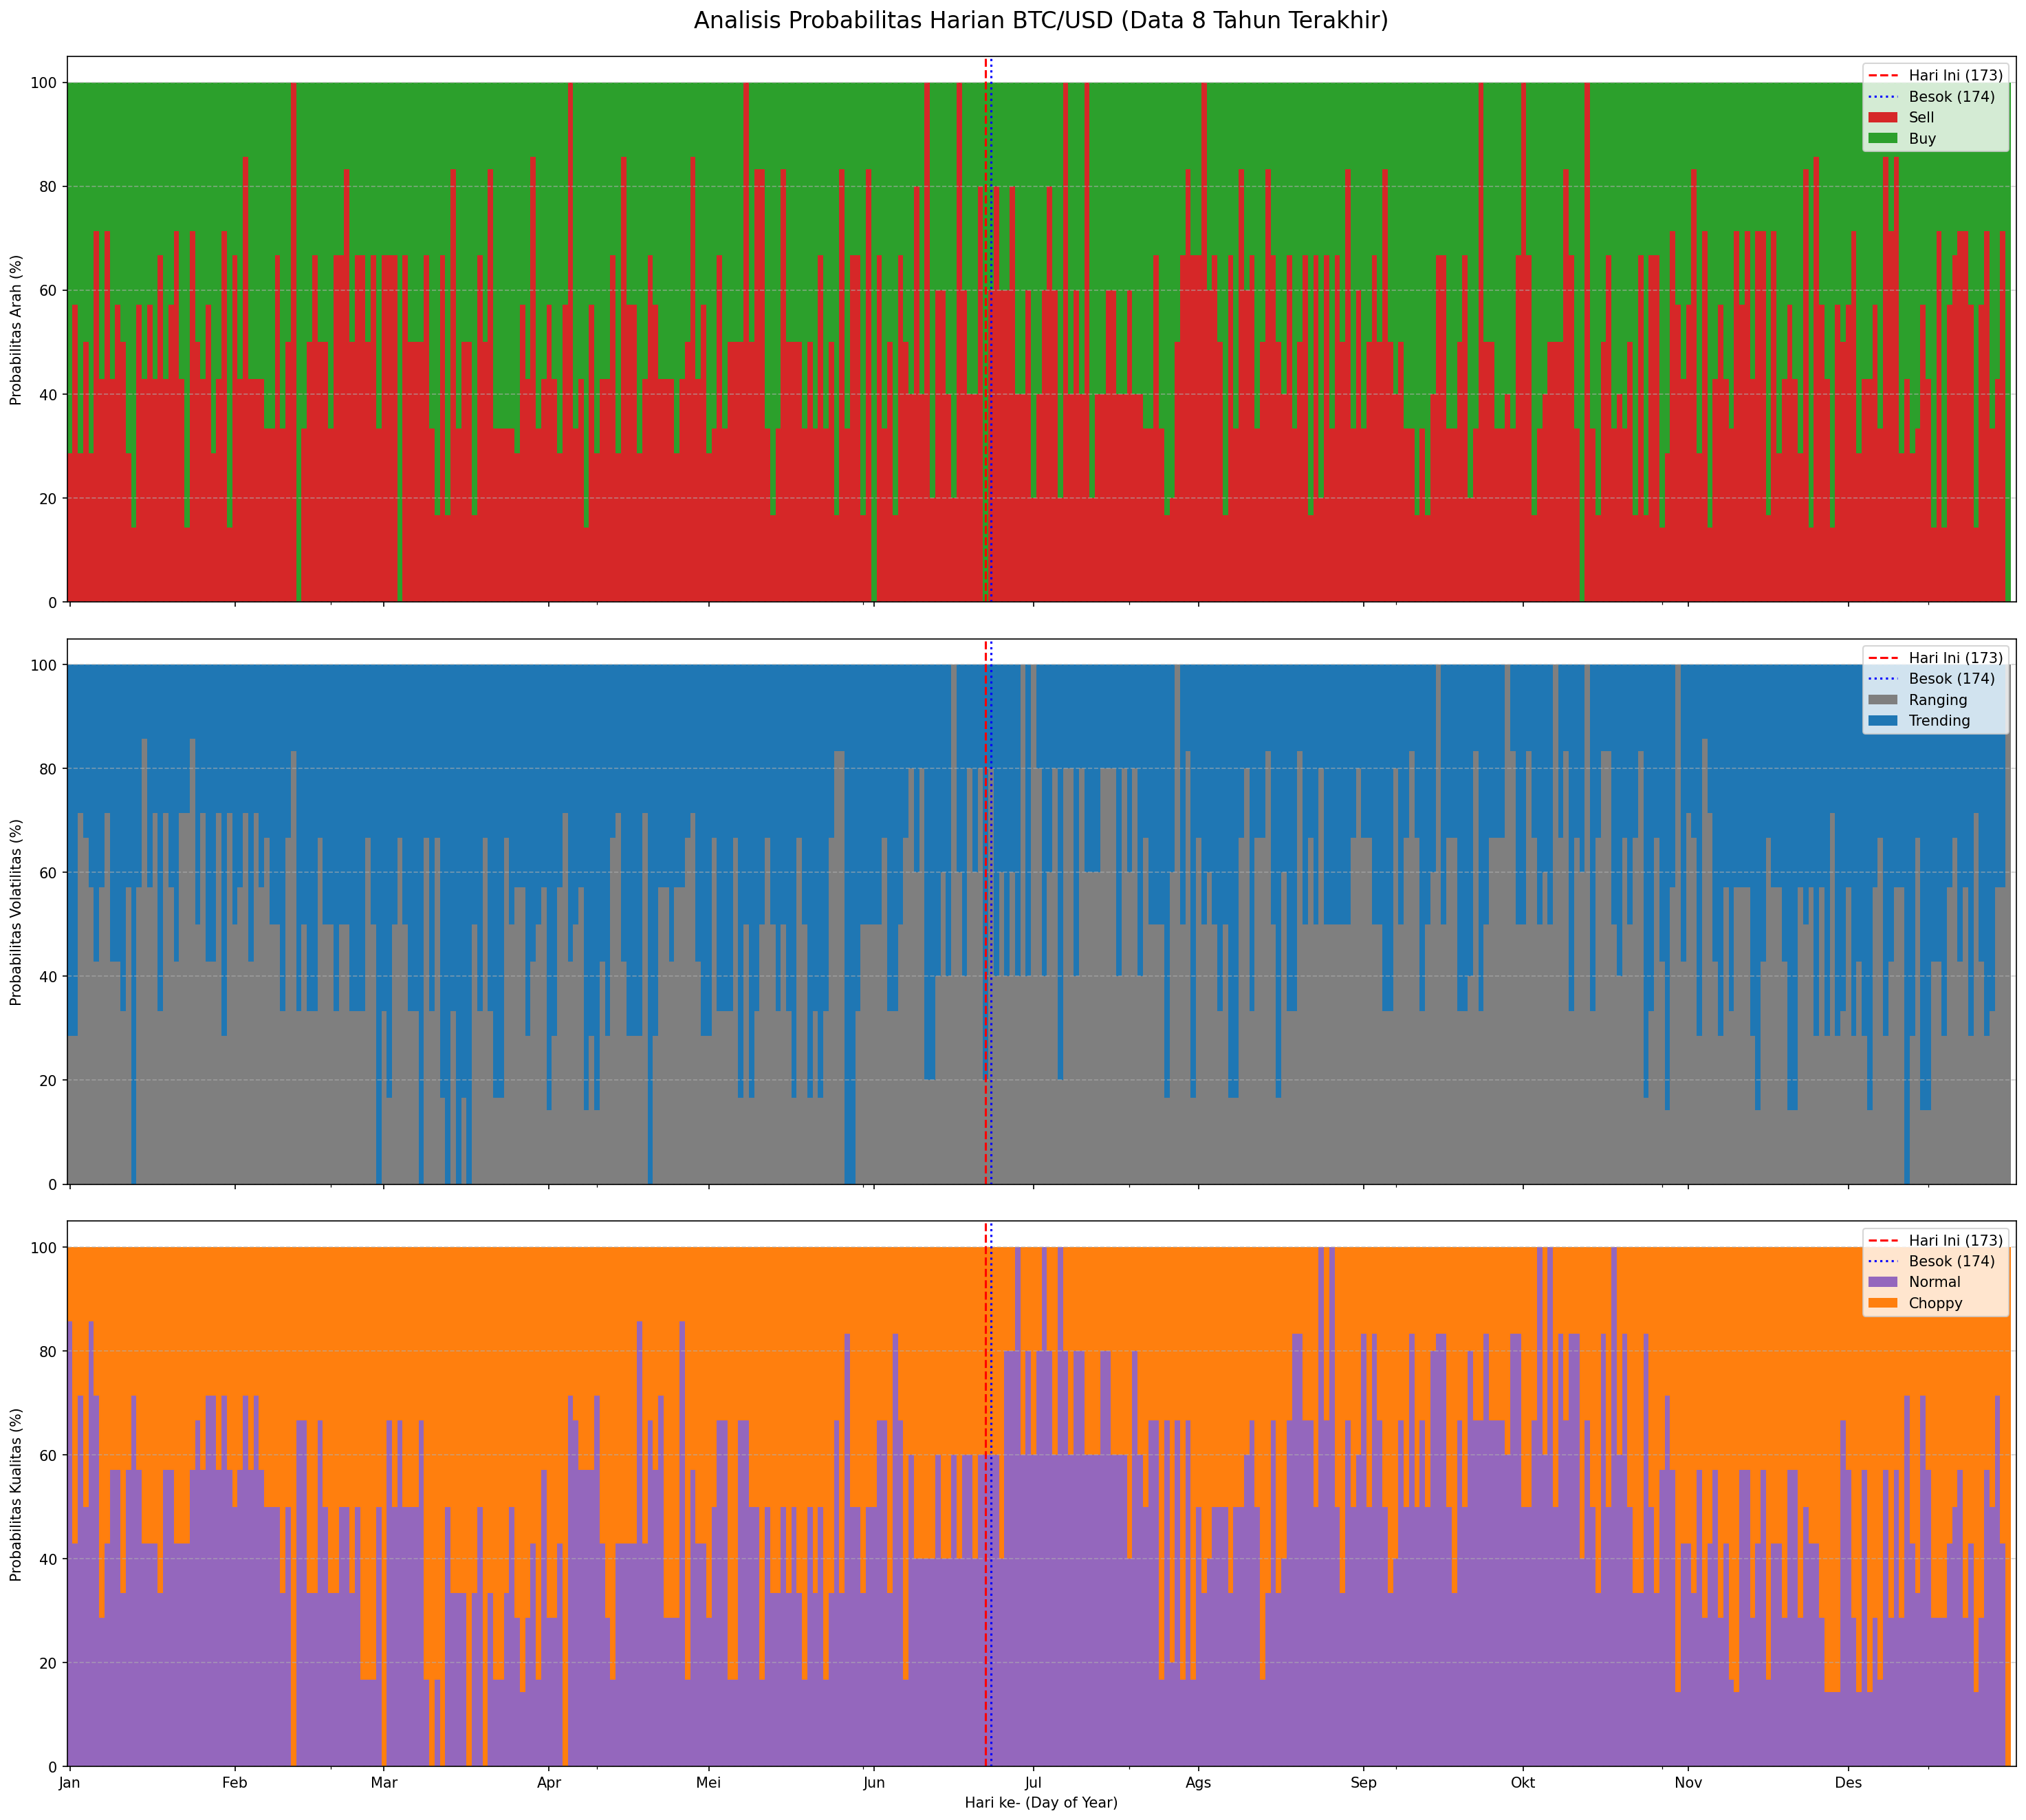


📊 Analisis Probabilitas Harian BTC/USD
📅 Tanggal Analisis: 22 June 2025

Ringkasan Probabilitas untuk HARI INI (22 June 2025)
(Hari ke-173 dalam setahun)
Berdasarkan data historis 8 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 20.00%
  🔴 Kecenderungan Sell     : 80.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 20.00%
  ⚪ Kecenderungan Ranging  : 80.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 40.00%
  🟣 Kecenderungan Normal   : 60.00%


Ringkasan Probabilitas untuk HARI ESOK (23 June 2025)
(Hari ke-174 dalam setahun)
Berdasarkan data historis 8 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 100.00%
  🔴 Kecenderungan Sell     : 0.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 80.00%
  ⚪ Kecenderungan Ranging  : 20.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 40.00%
  🟣 Kecenderungan Normal   : 60.00%



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta # <--- MODIFIKASI: Tambahkan timedelta
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal (Folder & Nama File) ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "BTCUSD_Daily_201803270000_202506080000.csv"
today = datetime.now(zona_waktu_wib)
tomorrow = today + timedelta(days=1) # <--- MODIFIKASI: Hitung tanggal untuk besok
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
# Karena data BTC dimulai dari 2018, filter 10 tahun terakhir secara efektif akan menggunakan semua data yang tersedia.
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday
tomorrow_day_of_year_num = tomorrow.timetuple().tm_yday # <--- MODIFIKASI: Dapatkan hari ke- untuk besok

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title(f'Analisis Probabilitas Harian BTC/USD (Data {len(latest_years)} Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    # <--- MODIFIKASI: Tambahkan garis vertikal untuk hari esok --->
    ax.axvline(x=tomorrow_day_of_year_num, color='blue', linestyle=':', linewidth=1.5, label=f'Besok ({tomorrow_day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian BTC/USD")
summary_lines.append(f"📅 Tanggal Analisis: {today.strftime('%d %B %Y')}")
summary_lines.append("\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI INI ({today.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

# Ringkasan untuk Hari Ini
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))

# <--- MODIFIKASI: Tambahkan blok ringkasan untuk HARI ESOK --->
summary_lines.append("\n\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI ESOK ({tomorrow.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{tomorrow_day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

# Ringkasan untuk Hari Esok
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, tomorrow_day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, tomorrow_day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, tomorrow_day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*60)


summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

# (Opsional) Simpan ringkasan ke file teks
# with open(summary_txt_filepath, 'w', encoding='utf-8') as f:
#     f.write(summary_text)
# print(f"\nRingkasan juga telah disimpan ke file: {summary_txt_filepath}")

Menampilkan grafik di layar...


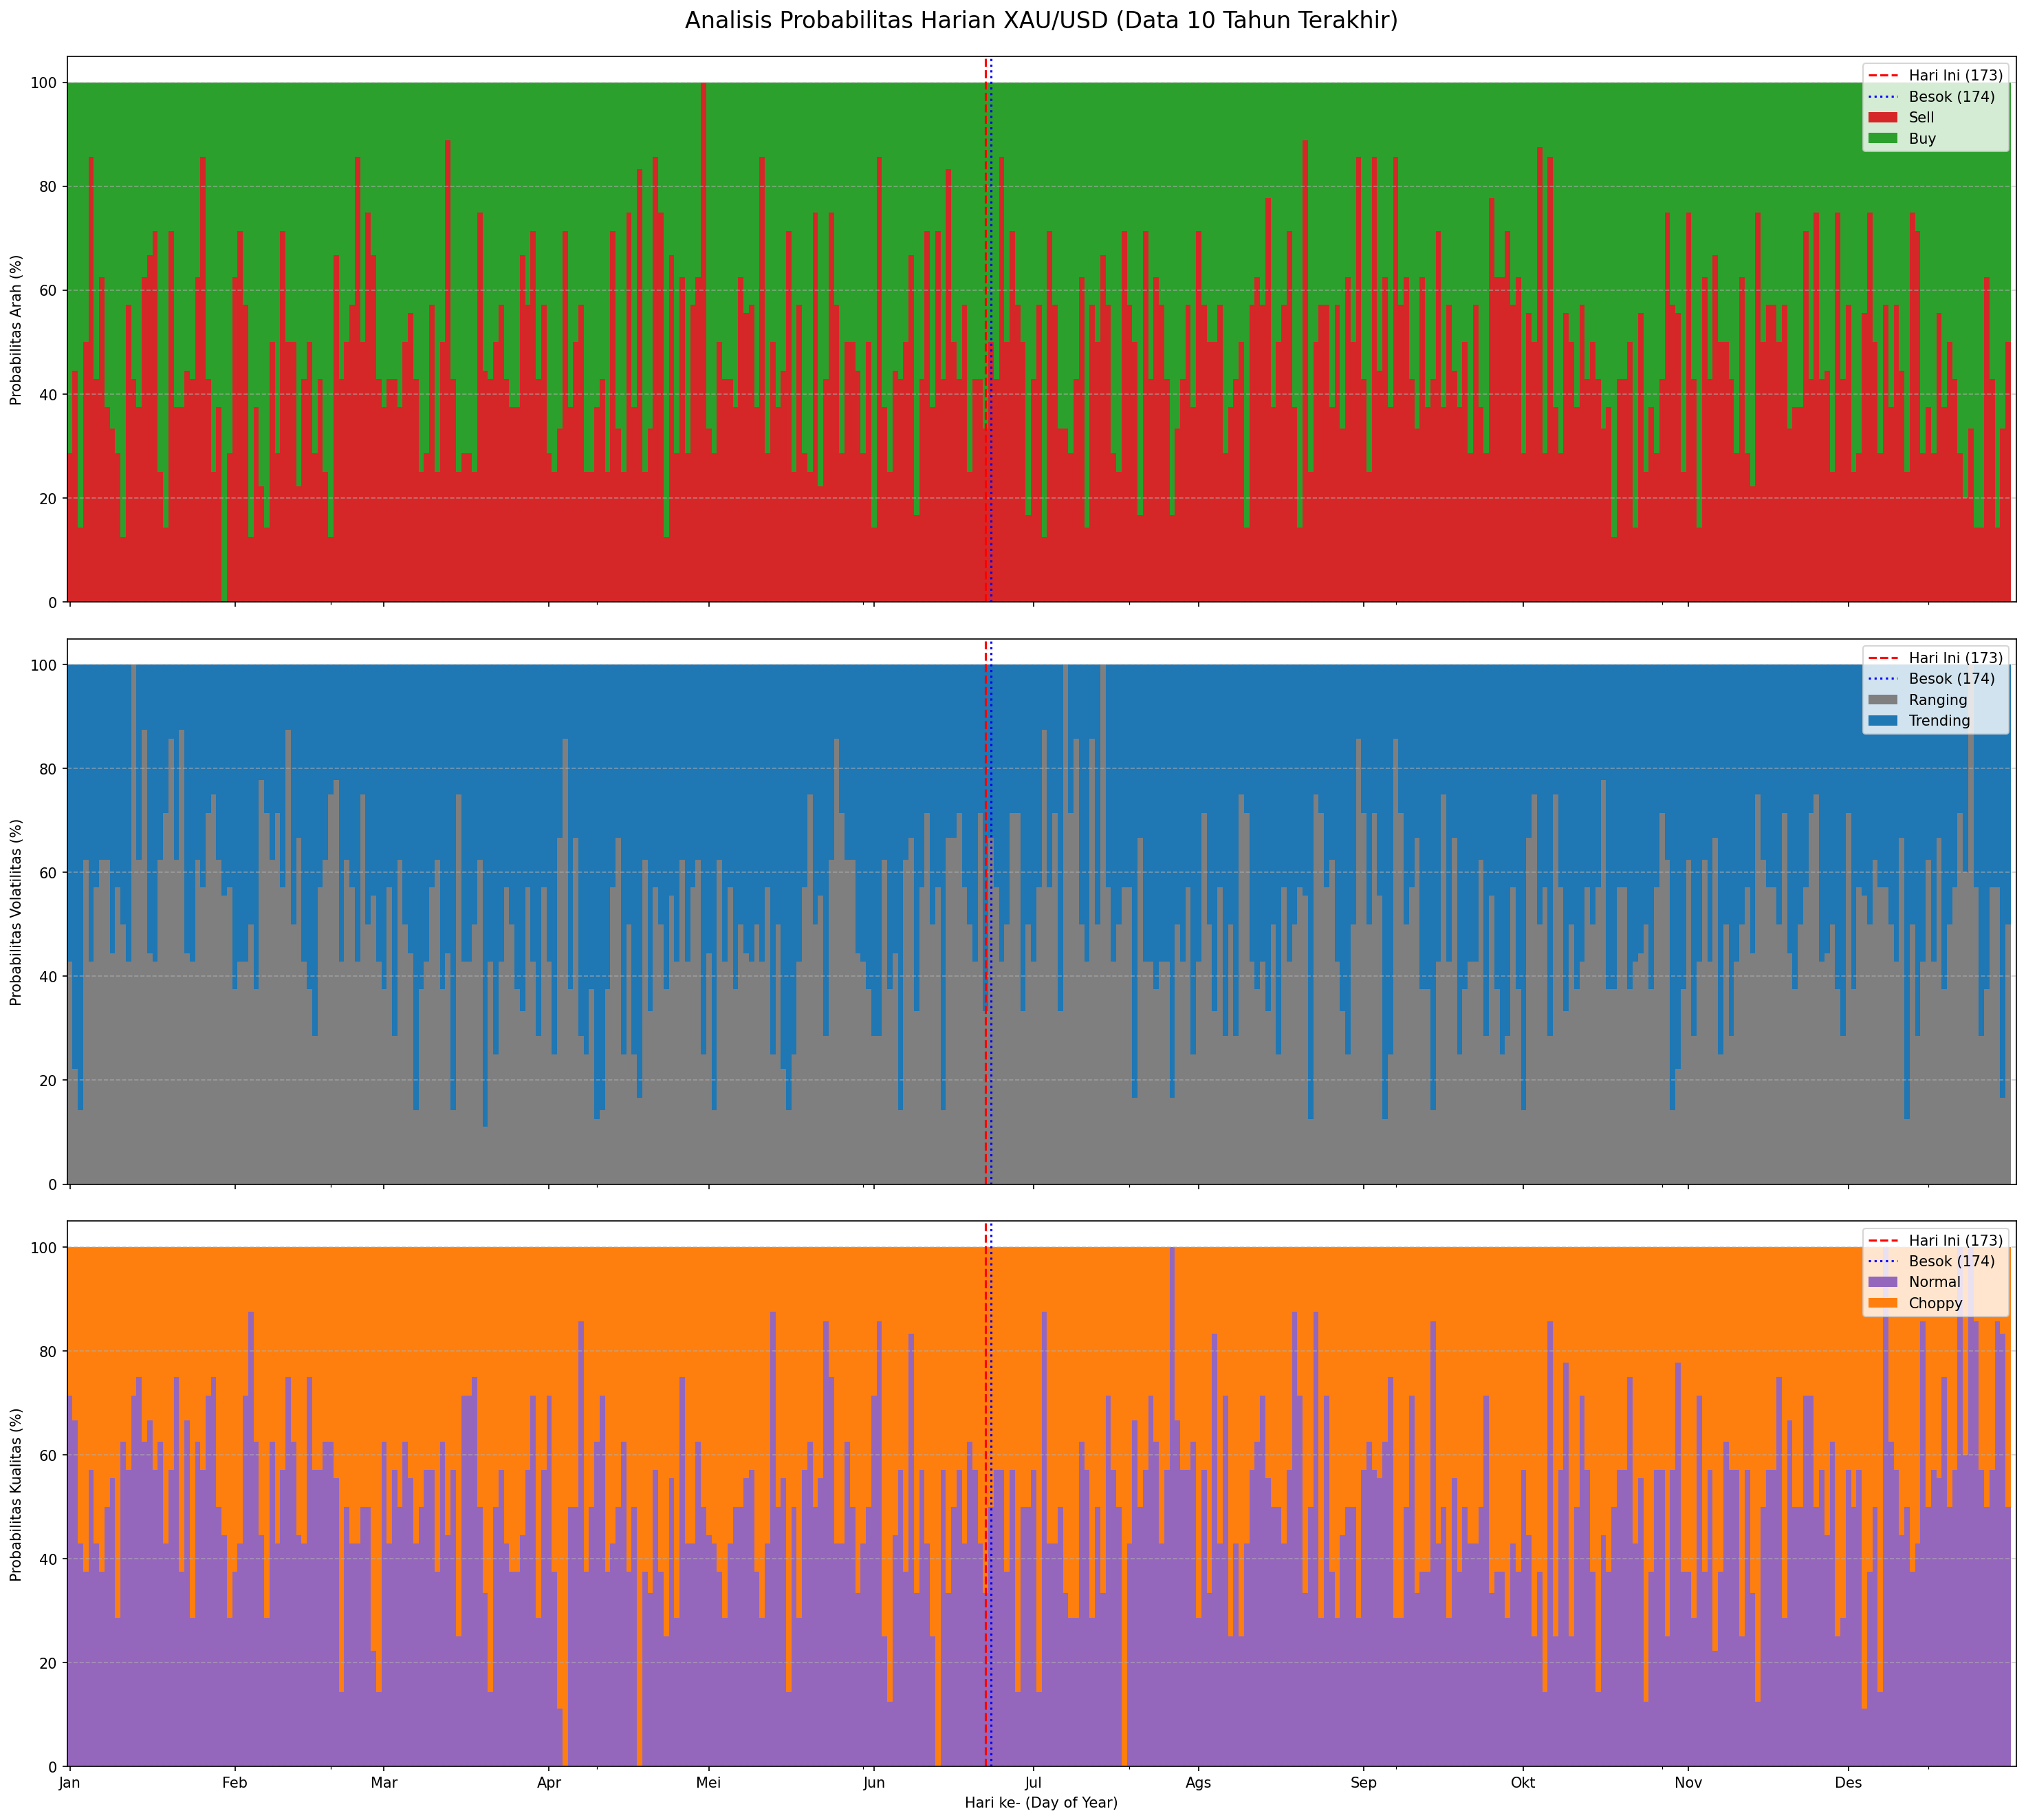


📊 Analisis Probabilitas Harian XAU/USD
📅 Tanggal Analisis: 22 June 2025

Ringkasan Probabilitas untuk HARI INI (22 June 2025)
(Hari ke-173 dalam setahun)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 57.14%
  🔴 Kecenderungan Sell     : 42.86%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 28.57%
  ⚪ Kecenderungan Ranging  : 71.43%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 57.14%
  🟣 Kecenderungan Normal   : 42.86%


Ringkasan Probabilitas untuk HARI ESOK (23 June 2025)
(Hari ke-174 dalam setahun)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 66.67%
  🔴 Kecenderungan Sell     : 33.33%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 66.67%
  ⚪ Kecenderungan Ranging  : 33.33%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 66.67%
  🟣 Kecenderungan Normal   : 33.33%



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta # <--- MODIFIKASI: Tambahkan timedelta
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal (Folder & Nama File) ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
today = datetime.now(zona_waktu_wib)
tomorrow = today + timedelta(days=1) # <--- MODIFIKASI: Hitung tanggal untuk besok
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday
tomorrow_day_of_year_num = tomorrow.timetuple().tm_yday # <--- MODIFIKASI: Dapatkan hari ke- untuk besok

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title(f'Analisis Probabilitas Harian XAU/USD (Data {len(latest_years)} Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    # <--- MODIFIKASI: Tambahkan garis vertikal untuk hari esok --->
    ax.axvline(x=tomorrow_day_of_year_num, color='blue', linestyle=':', linewidth=1.5, label=f'Besok ({tomorrow_day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian XAU/USD")
summary_lines.append(f"📅 Tanggal Analisis: {today.strftime('%d %B %Y')}")
summary_lines.append("\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI INI ({today.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        # Jika hari ini atau besok adalah hari libur (tidak ada data trading), tampilkan pesan
        lines.append("  Data historis tidak tersedia (kemungkinan hari libur/akhir pekan).")
    return lines

# Ringkasan untuk Hari Ini
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))

# <--- MODIFIKASI: Tambahkan blok ringkasan untuk HARI ESOK --->
summary_lines.append("\n\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI ESOK ({tomorrow.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{tomorrow_day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

# Ringkasan untuk Hari Esok
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, tomorrow_day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, tomorrow_day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, tomorrow_day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*60)


summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

# (Opsional) Simpan ringkasan ke file teks
# with open(summary_txt_filepath, 'w', encoding='utf-8') as f:
#     f.write(summary_text)
# print(f"\nRingkasan juga telah disimpan ke file: {summary_txt_filepath}")

Menampilkan grafik di layar...


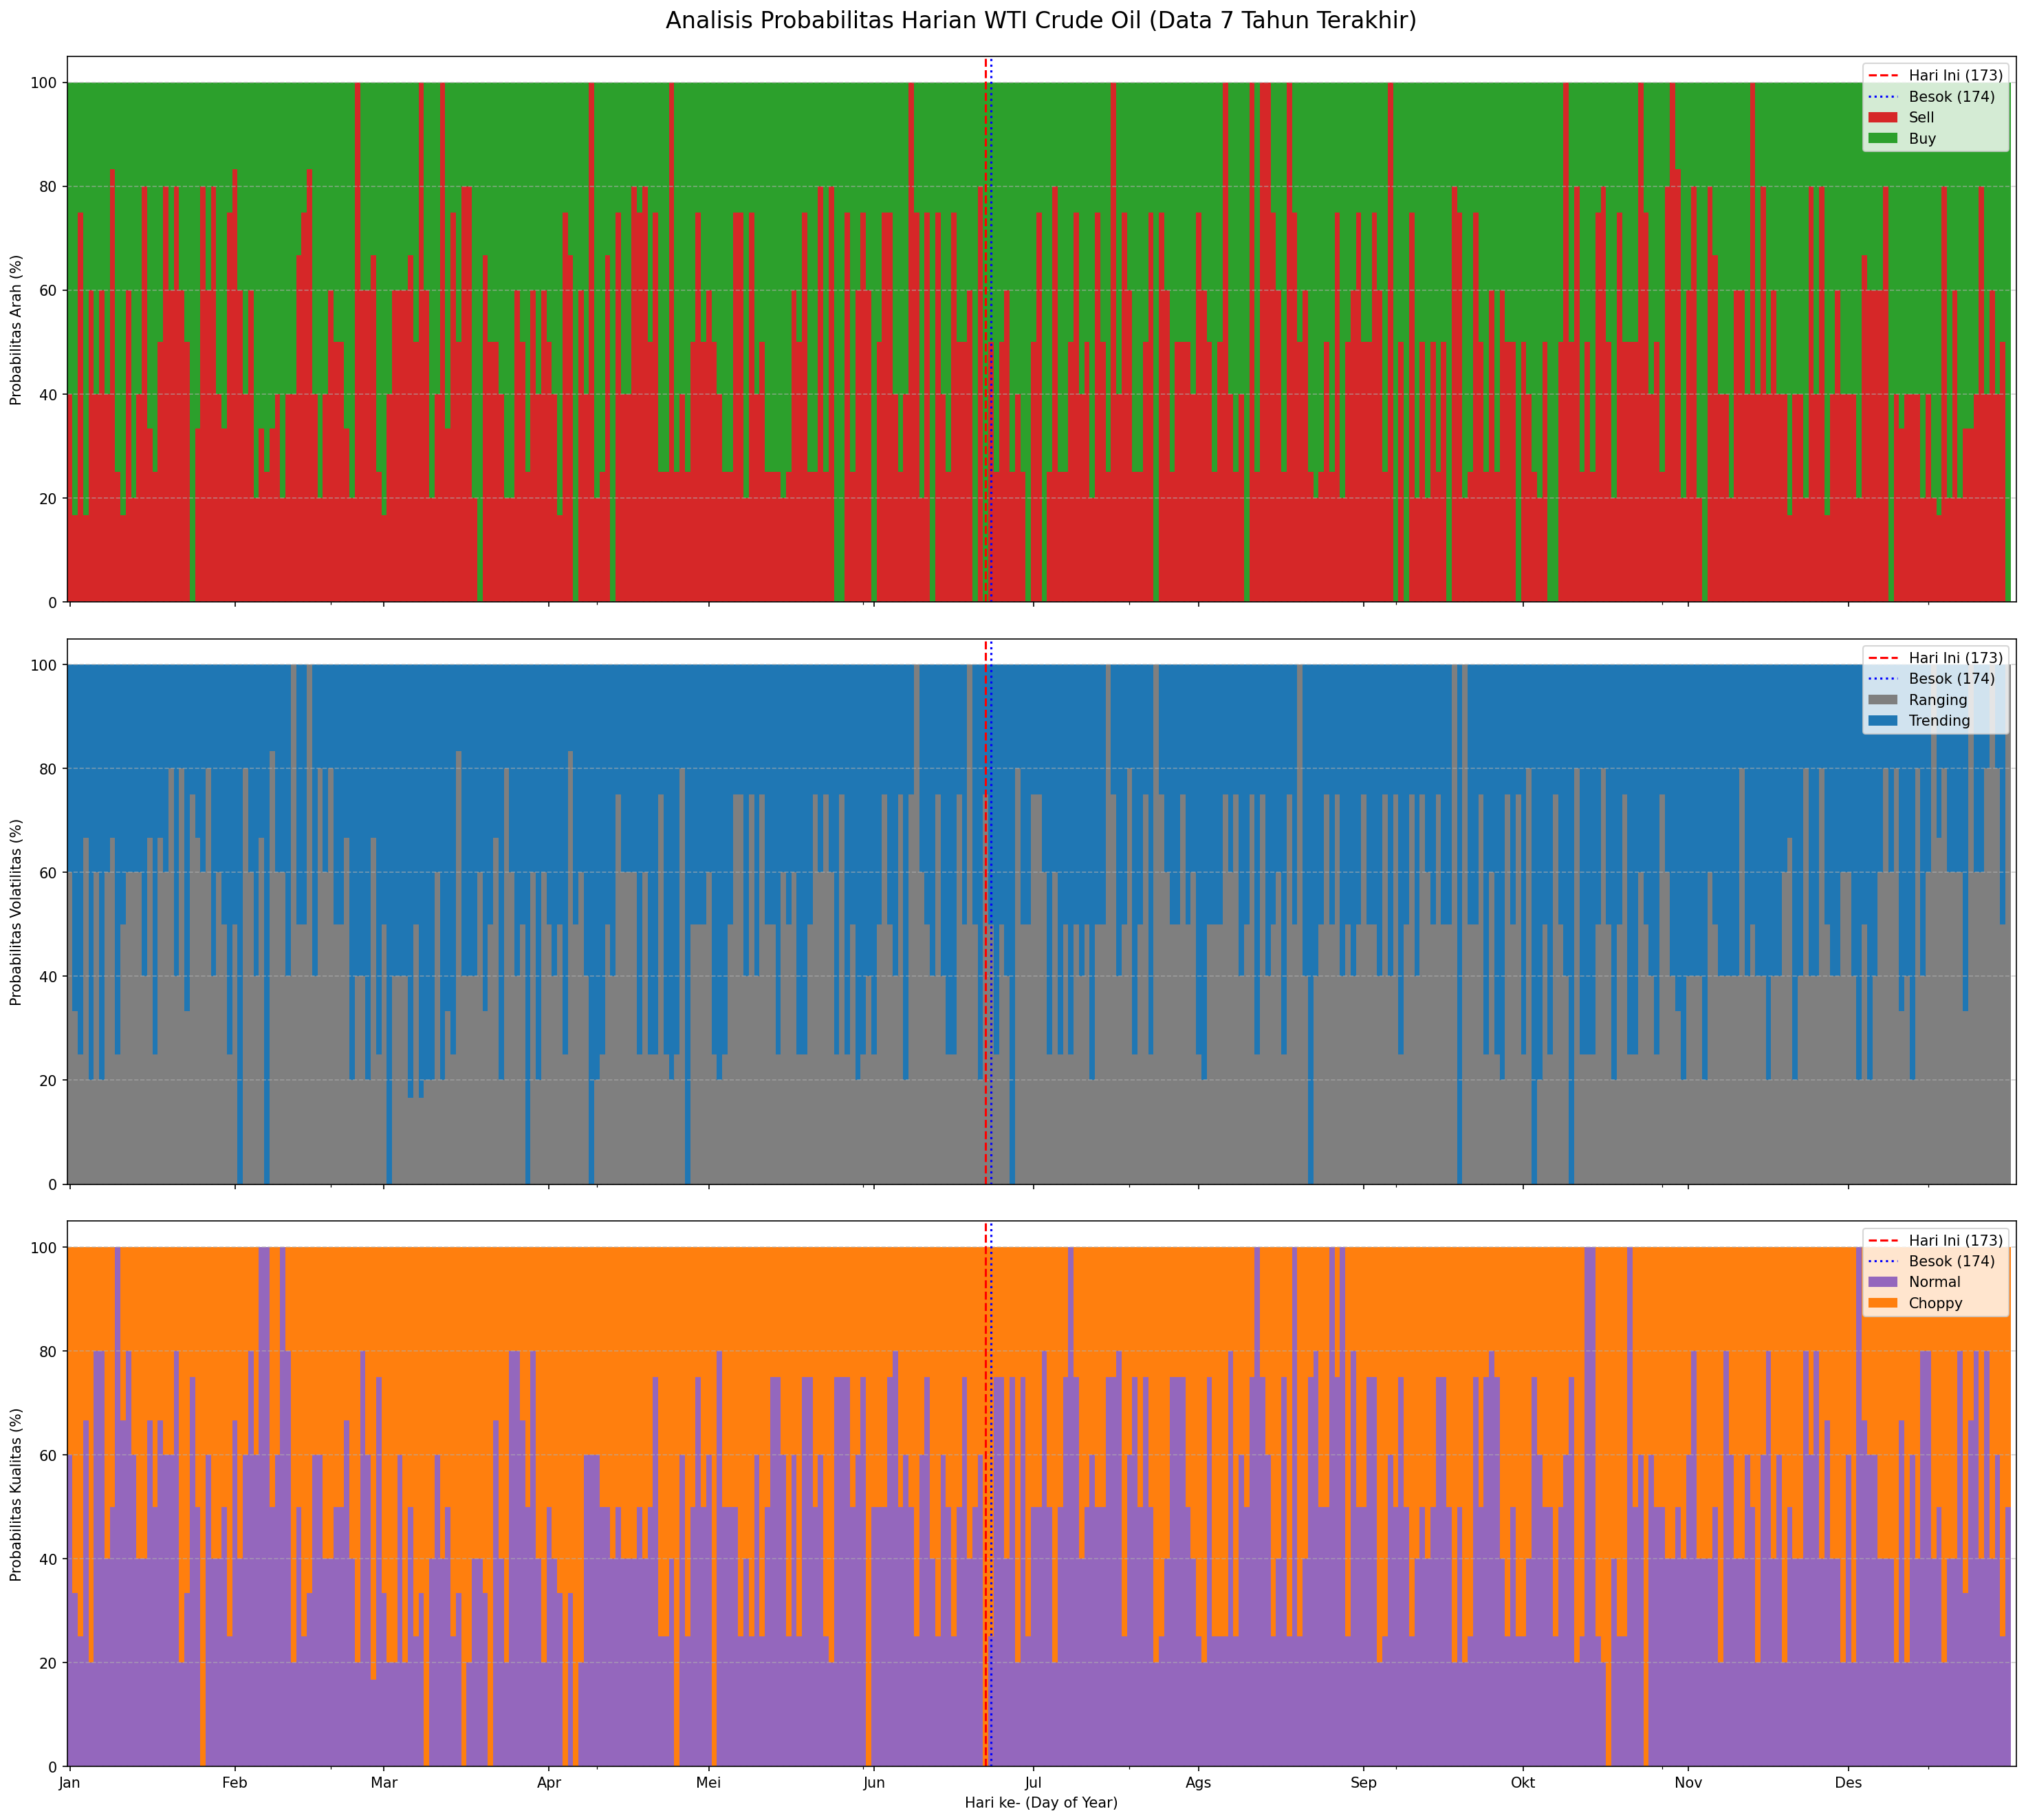


📊 Analisis Probabilitas Harian WTI Crude Oil
📅 Tanggal Analisis: 22 June 2025

Ringkasan Probabilitas untuk HARI INI (22 June 2025)
(Hari ke-173 dalam setahun)
Berdasarkan data historis 7 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 20.00%
  🔴 Kecenderungan Sell     : 80.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 80.00%
  ⚪ Kecenderungan Ranging  : 20.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 40.00%
  🟣 Kecenderungan Normal   : 60.00%


Ringkasan Probabilitas untuk HARI ESOK (23 June 2025)
(Hari ke-174 dalam setahun)
Berdasarkan data historis 7 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 100.00%
  🔴 Kecenderungan Sell     : 0.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 25.00%
  ⚪ Kecenderungan Ranging  : 75.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 100.00%
  🟣 Kecenderungan Normal   : 0.00%



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta # <--- MODIFIKASI: Tambahkan timedelta
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal (Folder & Nama File) ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "USOIL_Daily_201910290000_202506110000.csv"
today = datetime.now(zona_waktu_wib)
tomorrow = today + timedelta(days=1) # <--- MODIFIKASI: Hitung tanggal untuk besok
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday
tomorrow_day_of_year_num = tomorrow.timetuple().tm_yday # <--- MODIFIKASI: Dapatkan hari ke- untuk besok

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title(f'Analisis Probabilitas Harian WTI Crude Oil (Data {len(latest_years)} Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    # <--- MODIFIKASI: Tambahkan garis vertikal untuk hari esok --->
    ax.axvline(x=tomorrow_day_of_year_num, color='blue', linestyle=':', linewidth=1.5, label=f'Besok ({tomorrow_day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian WTI Crude Oil")
summary_lines.append(f"📅 Tanggal Analisis: {today.strftime('%d %B %Y')}")
summary_lines.append("\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI INI ({today.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        # Jika hari ini atau besok adalah hari libur (tidak ada data trading), tampilkan pesan
        lines.append("  Data historis tidak tersedia (kemungkinan hari libur/akhir pekan).")
    return lines

# Ringkasan untuk Hari Ini
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))

# <--- MODIFIKASI: Tambahkan blok ringkasan untuk HARI ESOK --->
summary_lines.append("\n\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI ESOK ({tomorrow.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{tomorrow_day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

# Ringkasan untuk Hari Esok
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, tomorrow_day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, tomorrow_day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, tomorrow_day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*60)


summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

# (Opsional) Simpan ringkasan ke file teks
# with open(summary_txt_filepath, 'w', encoding='utf-8') as f:
#     f.write(summary_text)
# print(f"\nRingkasan juga telah disimpan ke file: {summary_txt_filepath}")

Menampilkan grafik di layar...


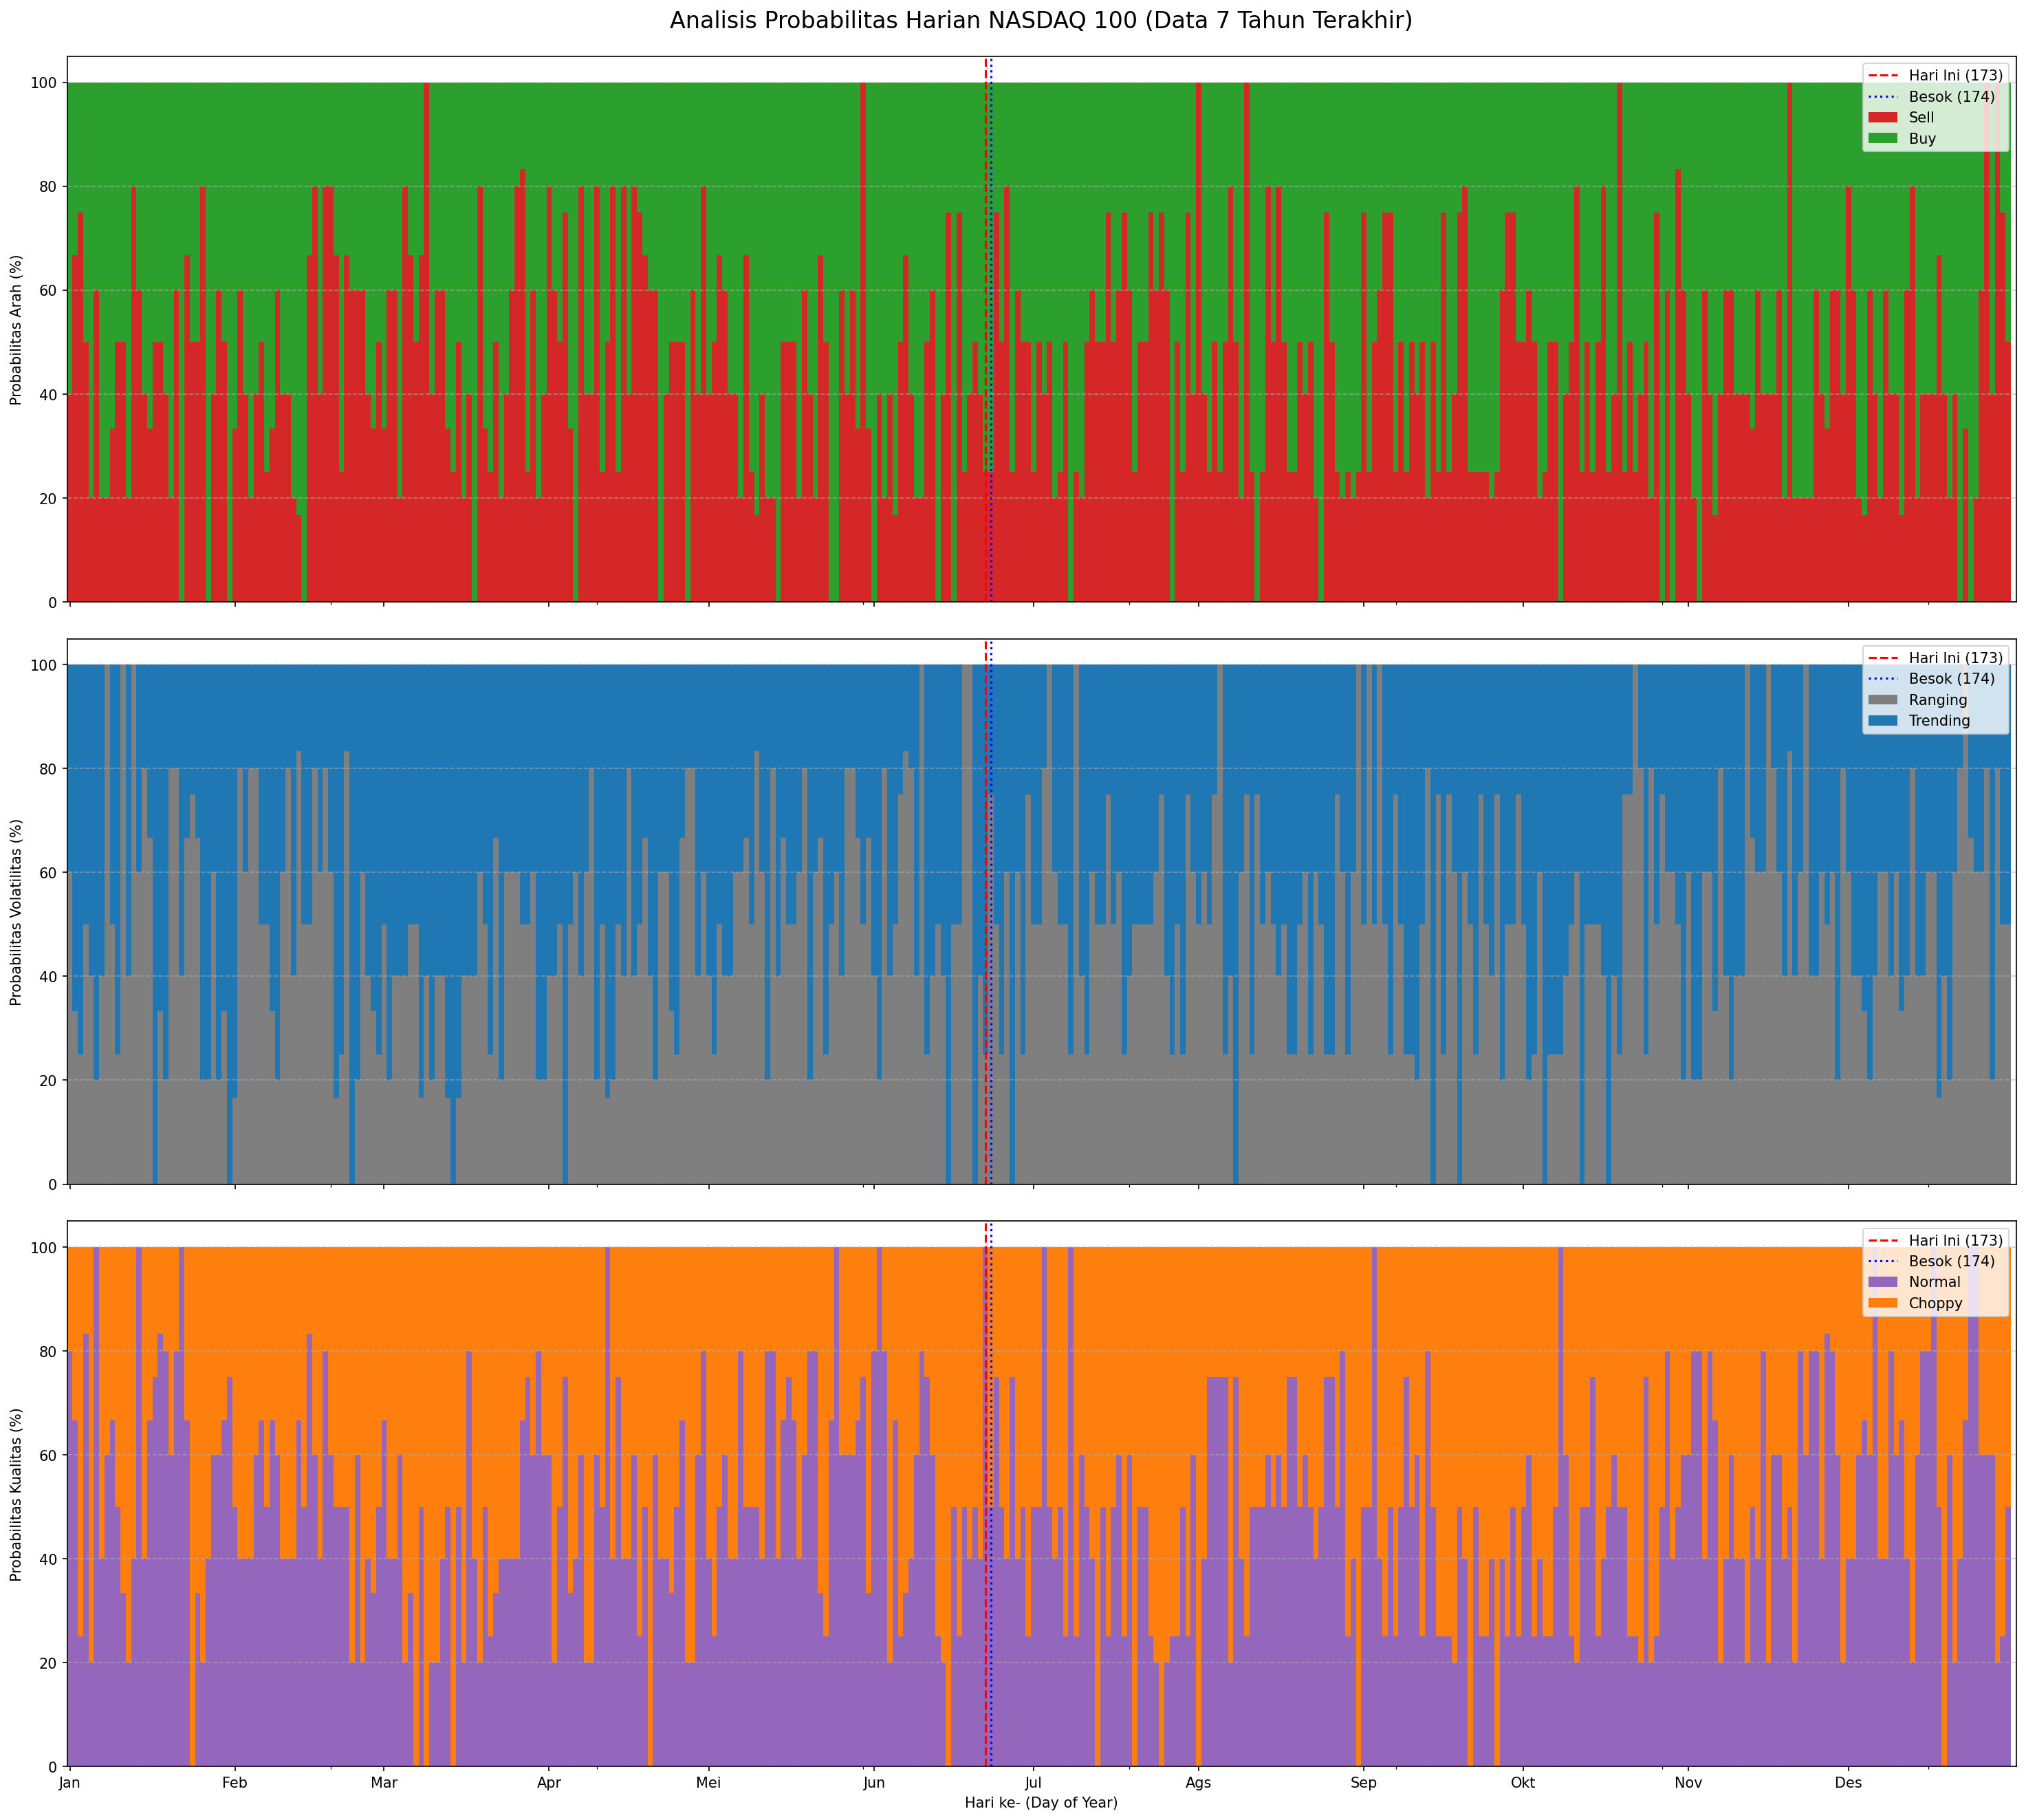


📊 Analisis Probabilitas Harian NASDAQ 100
📅 Tanggal Analisis: 22 June 2025

Ringkasan Probabilitas untuk HARI INI (22 June 2025)
(Hari ke-173 dalam setahun)
Berdasarkan data historis 7 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 60.00%
  🔴 Kecenderungan Sell     : 40.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 60.00%
  ⚪ Kecenderungan Ranging  : 40.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 60.00%
  🟣 Kecenderungan Normal   : 40.00%


Ringkasan Probabilitas untuk HARI ESOK (23 June 2025)
(Hari ke-174 dalam setahun)
Berdasarkan data historis 7 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 75.00%
  🔴 Kecenderungan Sell     : 25.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 75.00%
  ⚪ Kecenderungan Ranging  : 25.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 0.00%
  🟣 Kecenderungan Normal   : 100.00%



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta # <--- MODIFIKASI: Tambahkan timedelta
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal (Folder & Nama File) ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "USTEC_Daily_201910290000_202506110000.csv"
today = datetime.now(zona_waktu_wib)
tomorrow = today + timedelta(days=1) # <--- MODIFIKASI: Hitung tanggal untuk besok
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday
tomorrow_day_of_year_num = tomorrow.timetuple().tm_yday # <--- MODIFIKASI: Dapatkan hari ke- untuk besok

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title(f'Analisis Probabilitas Harian NASDAQ 100 (Data {len(latest_years)} Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    # <--- MODIFIKASI: Tambahkan garis vertikal untuk hari esok --->
    ax.axvline(x=tomorrow_day_of_year_num, color='blue', linestyle=':', linewidth=1.5, label=f'Besok ({tomorrow_day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian NASDAQ 100")
summary_lines.append(f"📅 Tanggal Analisis: {today.strftime('%d %B %Y')}")
summary_lines.append("\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI INI ({today.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        # Jika hari ini atau besok adalah hari libur (tidak ada data trading), tampilkan pesan
        lines.append("  Data historis tidak tersedia (kemungkinan hari libur/akhir pekan).")
    return lines

# Ringkasan untuk Hari Ini
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))

# <--- MODIFIKASI: Tambahkan blok ringkasan untuk HARI ESOK --->
summary_lines.append("\n\n" + "="*60)
summary_lines.append(f"Ringkasan Probabilitas untuk HARI ESOK ({tomorrow.strftime('%d %B %Y')})")
summary_lines.append(f"(Hari ke-{tomorrow_day_of_year_num} dalam setahun)")
summary_lines.append(f"Berdasarkan data historis {len(latest_years)} tahun terakhir:")
summary_lines.append("="*60)

# Ringkasan untuk Hari Esok
summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, tomorrow_day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, tomorrow_day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, tomorrow_day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*60)


summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

# (Opsional) Simpan ringkasan ke file teks
# with open(summary_txt_filepath, 'w', encoding='utf-8') as f:
#     f.write(summary_text)
# print(f"\nRingkasan juga telah disimpan ke file: {summary_txt_filepath}")